## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Godfrey Jeremiah

Student ID: 23310758

<hr style="border:2px solid gray"> </hr>

## Imports

In [206]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [166]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)


In [167]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [168]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [169]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

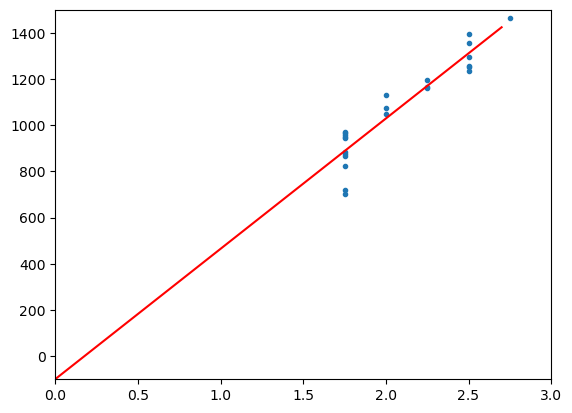

In [170]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

You may add as many cells as you require to complete this task.

### Task 1 | Goal of this Task

To create my own implementation of linear regression using my own functions to implement the required matrix manipulations.

As I have read the instructions carefully, I am required to inspect the reference implementation and **create functions for all the matrix manipulations** required to implement the linear regression algorithm.

1. **Use these matrix manipulation functions in a new function that takes the data (X) and outputs (y) and returns the least squares estimate of the linear regression weight vector**. Call this function **'fit'**.

2. **Create a second function that uses the weights found by the fit method and a number of data points X to create new predictions**. Call this function **'predict'**.

3. Finally, **create a function that returns the weights found by the fit method**. Call this function **'get_params'**.


**Important to note that:**
The function to calculate the <u>inverse of a matrix</u> need only be applicable to 2-by-2 matrices. All other functions should be able to handle matrices of arbitrary sizes.

Error handling is very useful to prevent matrices of incorrect sizes resulting in run-time errors. 

Add appropriate comments (doc-strings) to the functions I have created.

Taking the above instructions and guideines into account, I can now begin to attempt this task.

In [171]:
def calculate_inverse(X):
    """
    Calculate the inverse of a matrix.

    Args:
    X (numpy.ndarray): The input matrix.

    Returns:
    numpy.ndarray: The inverse of the input matrix.
    """
    return np.linalg.inv(X.T.dot(X)).dot(X.T)

def fit(X, y):
    """
    Fit a linear regression model to the data.

    Args:
    X (numpy.ndarray): The input data matrix, including the bias column.
    y (numpy.ndarray): The target values.

    Returns:
    numpy.ndarray: The weight vector for the linear regression model.
    """
    # Calculate the weights using the inverse method
    weights = calculate_inverse(X).dot(y)
    return weights

def predict(weights, X):
    """
    Make predictions using a linear regression model.

    Args:
    weights (numpy.ndarray): The weight vector of the linear regression model.
    X (numpy.ndarray): The input data matrix for prediction, including the bias column.

    Returns:
    numpy.ndarray: Predicted values based on the input data and weights.
    """
    return X.dot(weights)

def get_params(weights):
    """
    Get the weights found by the linear regression model.

    Args:
    weights (numpy.ndarray): The weight vector of the linear regression model.

    Returns:
    numpy.ndarray: The weight vector.
    """
    return weights

### Usage

In [172]:
# Let us test the functions to load the data in the file
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

# Fit the linear regression model
weights = fit(X, y)

# Make predictions for new data
new_data = np.array([[1, 5], [1, 6]])
predictions = predict(weights, new_data)

# Get the weights found by the model
model_weights = get_params(weights)

# Print to test the code
print("Weights:", model_weights)
print("Predictions:", predictions)


Weights: [[-99.46431881]
 [564.20389249]]
Predictions: [[2721.55514365]
 [3285.75903614]]


### Checking the data in file **'lr_data.csv'**

In [173]:
data = np.loadtxt('lr_data.csv', delimiter=',')
print(data)

X = data[:,0:2]
print(X)

y= [[data[i,2]] for i in range(0,len(data[:,2]))]
print(y)

[[1.000e+00 2.750e+00 1.464e+03]
 [1.000e+00 2.500e+00 1.394e+03]
 [1.000e+00 2.500e+00 1.357e+03]
 [1.000e+00 2.500e+00 1.293e+03]
 [1.000e+00 2.500e+00 1.256e+03]
 [1.000e+00 2.500e+00 1.254e+03]
 [1.000e+00 2.500e+00 1.234e+03]
 [1.000e+00 2.250e+00 1.195e+03]
 [1.000e+00 2.250e+00 1.159e+03]
 [1.000e+00 2.250e+00 1.167e+03]
 [1.000e+00 2.000e+00 1.130e+03]
 [1.000e+00 2.000e+00 1.075e+03]
 [1.000e+00 2.000e+00 1.047e+03]
 [1.000e+00 1.750e+00 9.650e+02]
 [1.000e+00 1.750e+00 9.430e+02]
 [1.000e+00 1.750e+00 9.580e+02]
 [1.000e+00 1.750e+00 9.710e+02]
 [1.000e+00 1.750e+00 9.490e+02]
 [1.000e+00 1.750e+00 8.840e+02]
 [1.000e+00 1.750e+00 8.660e+02]
 [1.000e+00 1.750e+00 8.760e+02]
 [1.000e+00 1.750e+00 8.220e+02]
 [1.000e+00 1.750e+00 7.040e+02]
 [1.000e+00 1.750e+00 7.190e+02]]
[[1.   2.75]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.25]
 [1.   2.25]
 [1.   2.25]
 [1.   2.  ]
 [1.   2.  ]
 [1.   2.  ]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]

#### Test Case

In [180]:
# Prepare your input data X (with bias) and target values y

X = np.array([[1, 3], [1, 5]])
y = np.array([5, 9])

# Fit the linear regression model
weights = fit(X, y)

# Make predictions for new data
new_data = np.array([[1, 5], [1, 7], [1, 9]])
predictions = predict(weights, new_data)

# Get the weights found by the model
model_weights = get_params(weights)

print("Weights:", model_weights)
print("Predictions:", predictions)


Weights: [-1.  2.]
Predictions: [ 9. 13. 17.]


<hr style="border:2px solid gray"> </hr>

## Reflection

Write your reflection in below cell.

## Documentation

##### For the Task:

Prepare your input data matrix **X** with the bias column, and target values **y**.
Use the **fit** function to obtain the weight vector for the linear regression model.

To make predictions for new data, use the **predict** function with the data matrix and the obtained weight vector.
To retrieve the weights found by the model, use the **get_params** function.

The understanding of the operations outlined below helped me to develop the solution for the task


### To evaluate Inverse of Matrix for 2x2 with error handler

In [181]:
# I would use in the reference implementation to handle any error
def evaluate_inverse(matrix):
    """
    Defines a calculate_inverse function that can calculate the inverse of a 2x2 matrix. 
    It checks for the matrix's dimensions and determinant and raises appropriate errors when needed.
    Note that the inverse of a matrix is often a negative value.
    """
    # Check if the matrix is 2by2
    if len(matrix) != 2 or len(matrix[0]) != 2 or len(matrix[1]) != 2:
        raise ValueError("Matrix inversion is only supported for 2x2 matrices")
        
    # Calculate the determinant of the matrix
    determinant = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    
    # Check if the determinant is zero
    if determinant == 0:
        raise ValueError("Matrix is singular; cannot be inverted.")
        
    # Calculate th inverse matrix elements
    q = matrix[0][0]
    r = matrix[0][1]
    s = matrix[1][0]
    t = matrix[0][0]
    
    inverse =[[q/determinant, -r/determinant], [-s/determinant, q/determinant]]
    return inverse

# Usage Test case
matrix = [[3,4], [6,7]]
inverse_matrix = evaluate_inverse(matrix)
print("Inverse Matrix TestCase", inverse_matrix)

Inverse Matrix TestCase [[-1.0, 1.3333333333333333], [2.0, -1.0]]


The inverse of a matrix exists only if the matrix is non-singular i.e., the determinant should not be 0. Using determinant and adjoint, we can easily find the inverse of a square matrix

In [ ]:
if det(A) != 0
    A-1 = adj(A)/det(A)
else
    "Inverse doesn't exist"  

### Evaluate the dot product of two matrices

In [183]:
def dot_product(M1, M2): # M1 is the first matrix while M2 is the second matrix
    """
    This defines a dot_product function that can calculate the dot product of two matrices. 
    It checks if the matrices can be multiplied by comparing the number of columns in the 
    first matrix to the number of rows in the second matrix. It then initializes a result 
    matrix with zeros and performs the dot product using nested loops.
    Video Slide 7 in the core material gave me clear insights on the dot product operations.
    """
    # Examine if the matrices can be multiplied
    if len(M1[0]) != len(M2):
        raise ValueError("Number of columns in matrix1 must match the number of rows in matrix2.")
    
    # Initialize the resultant matrix with zero
    result = [[0 for _ in range(len(M2[0]))] for _ in range(len(M1))]
    
    # Perform the dot product operation
    for i in range(len(M1)):
        for j in range(len(M2[0])):
            for k in range(len(M2)):
                result[i][j] += M1[i][k] * M2[k][j]
                
    return result

# Usage Test case
M1 = [[2, 3], [4 ,5]]
M2 = [[6, 7], [8, 9]]

res_matrix = dot_product(M1, M2)
for row in res_matrix:
    print(row)


[36, 41]
[64, 73]


### Transpose a Matrix

In linear algebra, the transpose of a matrix is an operator which flips a matrix over its diagonal; that is, it switches the row and column indices of the matrix A by producing another matrix, often denoted by Aᵀ. [Reference: Wikipedia]

Here, I transpose a matrix without using NumPy; by using a simple list comprehension.

In [186]:
def transpose_matrix(matrix):
    """
    
    """
    # Get the number of rows and columns in the matrix
    rows = len(matrix)
    cols =len(matrix[0])
    
    
    # Create a new matrix from a flipped dimension
    transposed_matrix = [[0 for _ in range(rows)] for _ in range(cols)] # <-- List comprehension; looping over the rows & cols
    
    # Input the transposed matrix with values from the original matrix
    
    for i in range(rows):
        for j in range(cols):
            transposed_matrix[j][i] = matrix[i][j]
            
    return transposed_matrix

# Usage Test case
matrix = [[3, 4, 5], [6, 7, 8]]
transposed_matrix = transpose_matrix(matrix)

for row in transposed_matrix:
    print(row)



[3, 6]
[4, 7]
[5, 8]


**Also take into considerations the algorithm in Pep's slide**

w = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y


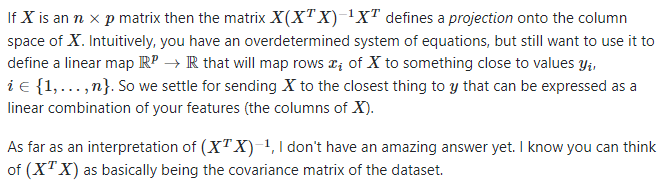

In [207]:
img = Image.open("transpose_algorithm.png")
display(img)

**Reference:** Stack Exchange - Intuition behind (X<sup>T</sup>X)<sup>-1
    
    

<br>

### Vector Space Axioms


**The Axiom rules for vectors are vital to compute different matrix operations:**

1. Closure under Addition: For any vectors u and v, their sum u + v is also a vector.

2. Associativity of Addition: For any vectors u, v, and w, the addition is associative, 
   meaning that (u + v) + w = u + (v + w).

3. Commutativity of Addition: For any vectors u and v, the addition is commutative, 
   meaning that u + v = v + u.

4. Identity Element of Addition: There exists a special vector 0 (the zero vector) such that for any 
   vector u, u + 0 = u.

5. Inverse Elements of Addition: For every vector u, there exists a vector -u (the additive inverse of u) 
   such that u + (-u) = 0.

6. Closure under Scalar Multiplication: For any vector u and scalar (real number) c, the scalar multiplication 
   c * u is also a vector.

7. Distributivity of Scalar Multiplication over Vector Addition: For any vector u and scalars c and d, 
   c * (u + v) = c * u + c * v.

8. Distributivity of Scalar Multiplication over Scalar Addition: For any vector u and scalars c and d, 
   (c + d) * u = c * u + d * u.

9. Compatibility of Scalar Multiplication with Scalar Multiplication: For any vector u and scalars c and d, 
   (c * d) * u = c * (d * u).

Matrix addition and scaling follow similar rules to vector addition and scaling, but the operations are performed element-wise. <br> Let's use the axioms for vector addition and scaling (specifically, Axiom 8) to describe how matrix addition and scaling work.

**Matrix Addition:**

Given two matrices A and B of the same dimensions (both are m x n matrices), you can add them element-wise to create a new matrix C:

**A = [a_ij]**, where i ranges from 1 to m and j ranges from 1 to n.

**B = [b_ij]**, where i ranges from 1 to m and j ranges from 1 to n.

**C = A + B = [a_ij + b_ij]**, where i ranges from 1 to m and j ranges from 1 to n.

In other words, each element in the resulting matrix C is the sum of the corresponding elements in A and B.

**Matrix Scaling:**

Given a matrix A and a scalar c, you can scale the matrix by multiplying each element by the scalar:

**A = [a_ij]**, where i ranges from 1 to m and j ranges from 1 to n.

**c * A = [c * a_ij]**, where i ranges from 1 to m and j ranges from 1 to n.

In this case, each element in the resulting matrix c * A is the product of the scalar c and the corresponding element in A.

In [187]:
# Example of usage:
def matrix_addition(A, B):
    """
    Performs and returns matrix addition
    
    """
    # Check if the matrices have the same dimensions
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        raise ValueError("Matrices must have the same dimensions for addition.")
    
    # Initialize the result matrix with zeros
    m, n = len(A), len(A[0])
    C = [[0 for _ in range(n)] for _ in range(m)]
    
    # Perform element-wise addition
    for i in range(m):
        for j in range(n):
            C[i][j] = A[i][j] + B[i][j]
    
    return C

def matrix_scaling(A, c):
    """
    Performs and returns matrix scaling
    
    """
    # Initialize the result matrix with zeros
    m, n = len(A), len(A[0])
    B = [[0 for _ in range(n)] for _ in range(m)]
    
    # Perform element-wise scaling
    for i in range(m):
        for j in range(n):
            B[i][j] = c * A[i][j]
    
    return B

# Example usage
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]
c = 2

C = matrix_addition(A, B)
D = matrix_scaling(A, c)

# Print the results
print("Matrix Addition:")
for row in C:
    print(row)

print("\nMatrix Scaling:")
for row in D:
    print(row)


Matrix Addition:
[6, 8]
[10, 12]

Matrix Scaling:
[2, 4]
[6, 8]
